In [22]:
import numpy as np;

class Perceptron():

    def __init__(self,learning_rate=0.01,n_iter=50,random_state=1):
        self.learning_rate=learning_rate
        self.n_iter=n_iter
        self.rst=random_state;


    def fit(self,X,y):
        """X es un matriz con dimesiones [n_muestras n_caracteristicas]
        y es el vector de etiquetas o vector objetivo, donde y es [n_muestras,]

        """
        gen=np.random.RandomState(self.rst)
        self.weights_=np.random.normal(loc=0,scale=0.01,size=1+X.shape[1])

        self.errores_=[]

        for _  in range(self.n_iter):
            errores=0
            for muestra,target in zip(X,y):
                update=self.learning_rate*(target-self.predict(muestra))
                self.weights_[1:]+=muestra*update
                self.weights_[0]+=update
                errores+=int(update!=0)
            self.errores_.append(errores)
        return  self


    def net_input(self,X):
        return np.dot(X,self.weights_[1:]+self.weights_[0])


    def predict(self,muestra):
        return np.where(self.net_input(muestra)>=0,1,-1)



Text(0, 0.5, 'Longitud_petalo[cm]')

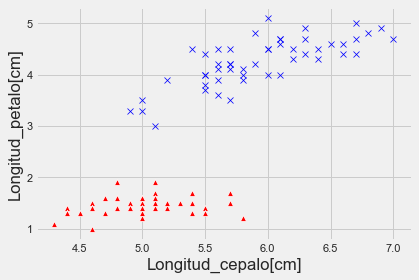

In [92]:
####Desarrollando un perceptron para la clasificación de datos

from sklearn.datasets import load_iris;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
plt.style.use('fivethirtyeight')

iris = load_iris()
features = iris.data

sns.scatterplot(features[:50,0],features[:50,2],color='red',marker='^')
sns.scatterplot(features[50:100,0],features[50:100,2],color='blue',marker='x')
plt.xlabel('Longitud_cepalo[cm]')
plt.ylabel('Longitud_petalo[cm]')


In [75]:

perceptron=Perceptron(learning_rate=0.1,n_iter=10)

X=features[:100,[0,2]]
y=iris.target[0:100]
y=np.where(y==0,-1,1)
ppn=perceptron.fit(X,y)



Text(0, 0.5, 'Longitud_pétalo[cm]')

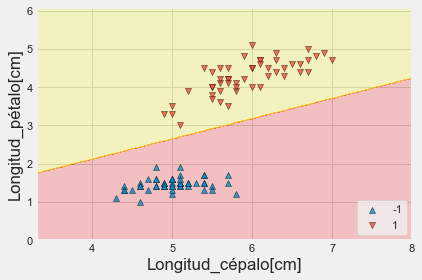

In [93]:
###Función para graficar limites de desicción en muestras de bidimensionales
from  matplotlib.colors import ListedColormap;import numpy as np;import matplotlib.pyplot as plt
def visualizar_fronteras(X,y,modelo,muestreo=0.02):
    marcadores=['^','v','o','^','v']
    colores=['red','yellow','black','yellow','gray']
    
    mapa_colores=ListedColormap(colores[:len(np.unique(y))])
    
    x_min_f1,x_max_f1=(X[:,0]).min()-1,(X[:,0]).max()+1  ##Característica Longitud_cépalo
    x_min_f2,x_max_f2=(X[:,1]).min()-1,(X[:,1]).max()+1###Característicaa longitud_pétalo
    
    vector1=np.arange(x_min_f1,x_max_f1,muestreo)
    vector2=np.arange(x_min_f2,x_max_f2,muestreo)
    
    x_meshgrid,y_meshgrid=np.meshgrid(vector1,vector2)
    
    Z=modelo.predict(np.array([x_meshgrid.ravel(),y_meshgrid.ravel()]).T)
    Z=Z.reshape(x_meshgrid.shape)
    plt.contourf(x_meshgrid,y_meshgrid,Z,alpha=0.2,cmap=mapa_colores)
    
    plt.xlim(x_min_f1,x_max_f1)
    plt.ylim(x_min_f2,x_max_f2)
    
    for i,index in enumerate(np.unique(y)):
        plt.scatter(x=X[y==index,0],y=X[y==index,1],marker=marcadores[i],alpha=0.8,edgecolor='black',label=index)
        plt.legend(loc='lower right')

visualizar_fronteras(X,y,ppn)
plt.xlabel('Longitud_cépalo[cm]')
plt.ylabel('Longitud_pétalo[cm]')
    
    